In [60]:
#Importando paquetes

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [61]:
#Leyendo datos

df = pd.read_csv("C:/Users/LUISPEDRO/Desktop/Universidad Del Valle/Semestre 7/InteligenciaArtificial/Lab3/minute_weather.csv")
df.shape

(1587257, 13)

In [62]:
#Podemos ver muchos 0 y NaN en lluvia
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [63]:
#Son demasiados datos, entonces quitar el 10%
sampled_df = df[(df['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [64]:
#Analizando 
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [65]:
#Estos datos fueron tomados en una sequía, y como podemos ver hay demasiadas columnas con "0" en lluvia y en duración de lluvia
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [66]:
#Estos datos fueron tomados en una sequía, y como podemos ver hay demasiadas columnas con "0" en lluvia y en duración de lluvia
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [67]:
#Eliminandolos
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [68]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [69]:
#Eliminamos 46 filas
rows_before - rows_after

46

In [70]:
#Columnas
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [73]:
#Los features que nos importan
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [74]:
#Haciendo dataframe con las que nos interesan
select_df = sampled_df[features]

In [75]:
#Mostrar las columnas
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [76]:
#Mostrarla
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [77]:
#Pansandolas a una misma escala con startadscaler
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [87]:
#K means con 12 clusters
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [88]:
#Determinar el centro de los clusters para no tener tanto ruido, y solo una linea
centers = model.cluster_centers_
centers

array([[ 0.73206887,  0.43438296,  0.28680093, -0.5315396 ,  0.47403146,
        -0.53778938, -0.77156714],
       [-0.84362174, -1.19765696,  0.3744704 ,  0.34207609,  0.47331196,
         0.33006332,  1.36365408],
       [ 0.26152237, -0.99372934,  0.66254275, -0.5466912 ,  0.85355533,
        -0.52904561,  1.15558853],
       [-0.16473922,  0.86415517, -1.31110518, -0.58955068, -1.16680798,
        -0.60481749, -0.64071687],
       [ 1.19071455, -0.25460439, -1.15488125,  2.12048667, -1.05329558,
         2.23719032, -1.13471953],
       [-1.17674901, -0.87899769,  0.44614522,  1.97221527,  0.53819433,
         1.93368656,  0.9177711 ],
       [ 0.13122245,  0.84385912,  1.41106454, -0.6387328 ,  1.67508769,
        -0.58951063, -0.71441897],
       [ 0.23396264,  0.32004883,  1.88793525, -0.65184949, -1.55170412,
        -0.57668218, -0.28325778],
       [ 1.36608464, -0.08037808, -1.20746421, -0.05323705, -1.07613082,
        -0.03318205, -0.97739402],
       [-0.21363652,  0.6298

In [89]:
#Función pd centers
#Referencia: https://www.kaggle.com/code/ravichaubey1506/machine-learning-at-scale-with-pyspark/notebook
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [90]:
#Funcion parallel plot
#Referencia: https://www.kaggle.com/code/ravichaubey1506/machine-learning-at-scale-with-pyspark/notebook
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [91]:
#Los 12 centros de los cluster son los siguientes
Clusters = pd_centers(features, centers)
Clusters


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.732069,0.434383,0.286801,-0.531540,0.474031,-0.537789,-0.771567,0
1,-0.843622,-1.197657,0.374470,0.342076,0.473312,0.330063,1.363654,1
2,0.261522,-0.993729,0.662543,-0.546691,0.853555,-0.529046,1.155589,2
3,-0.164739,0.864155,-1.311105,-0.589551,-1.166808,-0.604817,-0.640717,3
4,1.190715,-0.254604,-1.154881,2.120487,-1.053296,2.237190,-1.134720,4
5,-1.176749,-0.878998,0.446145,1.972215,0.538194,1.933687,0.917771,5
6,0.131222,0.843859,1.411065,-0.638733,1.675088,-0.589511,-0.714419,6
7,0.233963,0.320049,1.887935,-0.651849,-1.551704,-0.576682,-0.283258,7
8,1.366085,-0.080378,-1.207464,-0.053237,-1.076131,-0.033182,-0.977394,8
9,-0.213637,0.629848,0.408372,0.735911,0.516461,0.673867,-0.148676,9


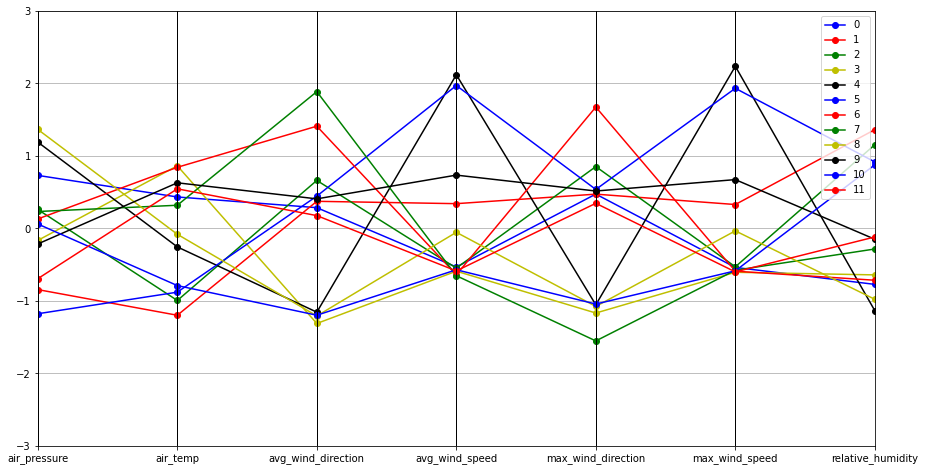

In [93]:
#Podemos ver los 12 clusters multivariables
parallel_plot(Clusters)

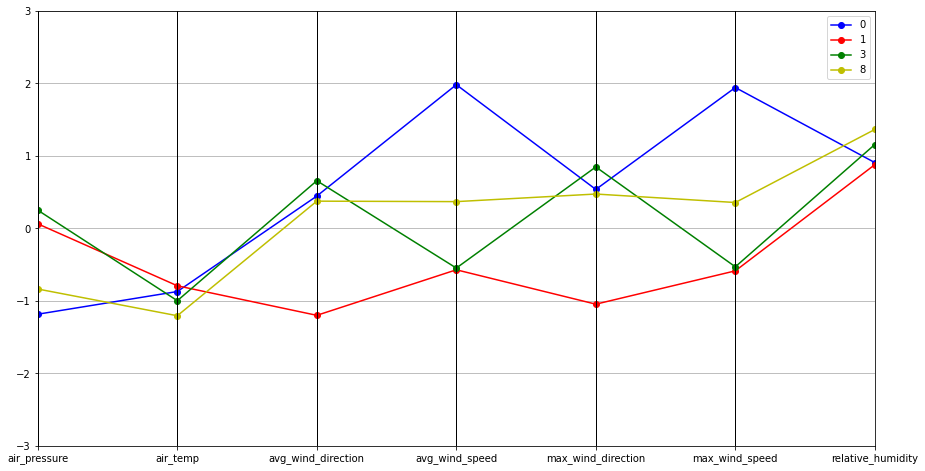

In [102]:
#Clusters de días humedos. Con humedad mayor a cero
parallel_plot(P[P['relative_humidity'] > 0])

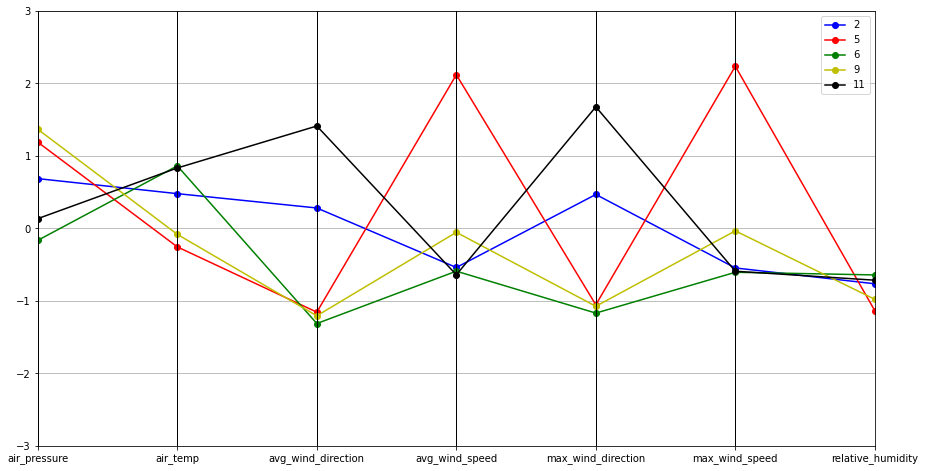

In [103]:
#Clusters de días secos, con humedad baja

parallel_plot(P[P['relative_humidity'] < -0.5])

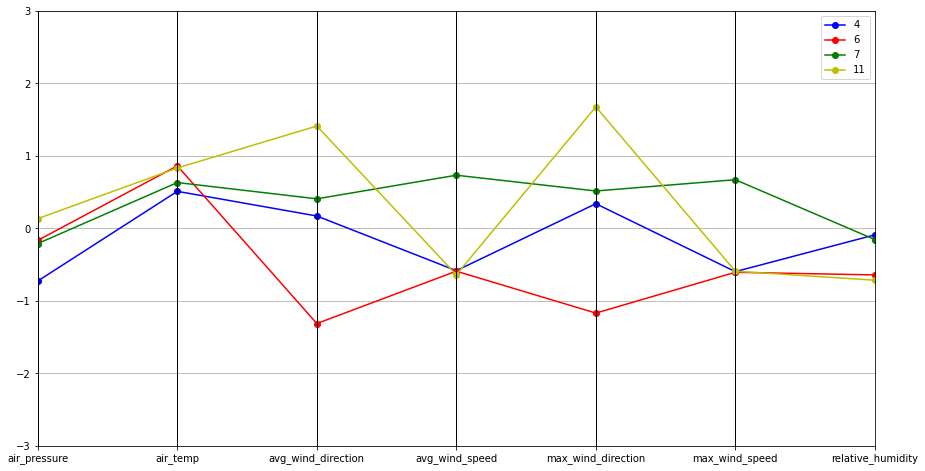

In [104]:
#Clusters de días calientes
parallel_plot(P[P['air_temp'] > 0.5])

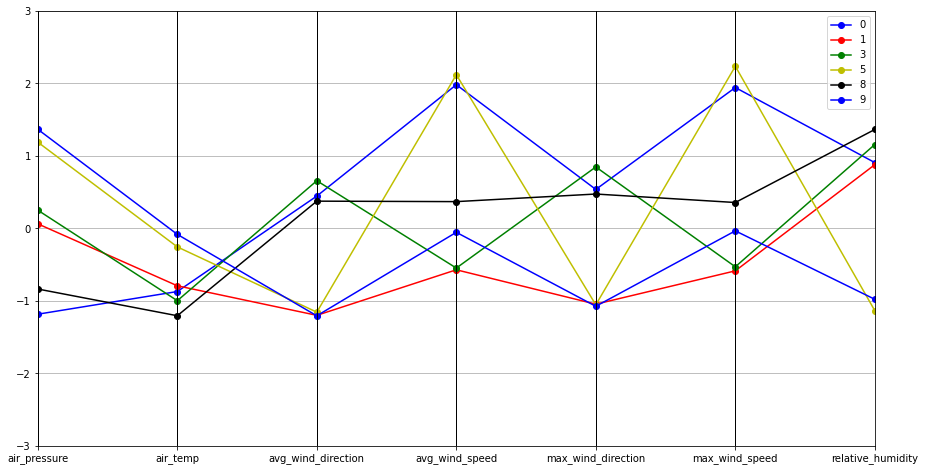

In [105]:
#Días fríos. Con temperatura baja
parallel_plot(P[ (P['air_temp'] < 0)])